In [2]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# 1. 공간 필터링

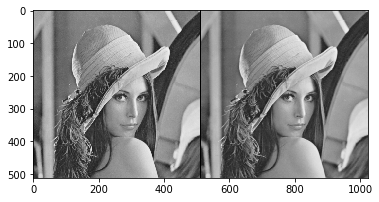

In [5]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :    
        sum = ( int(src[r,c-1]) + src[r,c] + src[r,c+1] ) / 3
        dst[r,c] = sum                
imshow("", np.hstack((src, dst)))

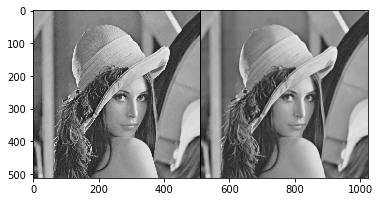

In [10]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :    
        sum = 0
        for r1 in range(-1,2) :
            for c1 in range(-1, 2) :
                sum += src[r + r1, c + c1]
        dst[r,c] = sum / 9               
imshow("", np.hstack((src, dst)))

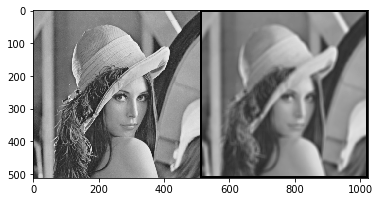

In [12]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :    
        sum = 0
        for r1 in range(-5,6) :
            for c1 in range(-5, 6) :
                sum += src[r + r1, c + c1]
        dst[r,c] = sum / (11*11)
imshow("", np.hstack((src, dst)))

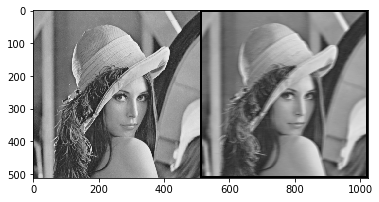

In [13]:
# 모션 블러
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :    
        sum = 0
        for c1 in range(-5, 6) :
            sum += src[r + r1, c + c1]
        dst[r,c] = sum / 11
imshow("", np.hstack((src, dst)))

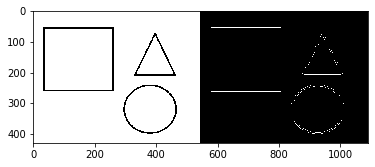

In [7]:
src = cv2.imread('box.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :    
        #out = np.abs(int(src[r,c]) - src[r,c+1]) # -255 ~ 255
        out = np.abs(int(src[r,c]) - src[r-1,c]) # -255 ~ 255        
        dst[r,c] = out  

dst = (dst > 50)*255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))

cv2.imshow('dst', np.hstack((src, dst)))
cv2.waitKey()
cv2.destroyAllWindows()


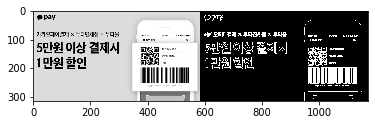

In [19]:
src = cv2.imread('ocr3.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :    
        #out = np.abs(int(src[r,c]) - src[r,c+1]) # -255 ~ 255
        out = np.abs(int(src[r,c]) - src[r,c-1]) # -255 ~ 255        
        out2 = np.abs(int(src[r,c]) - src[r-1,c]) # -255 ~ 255                
        dst[r,c] = (out  + out2)  /2 

dst = (dst > 20)*255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))

cv2.imshow('dst', np.hstack((src, dst)))
cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
mask = np.array([
    [1/9.0 , 1/9.0, 1/9.0, ],
    [1/9.0 , 1/9.0, 1/9.0, ],
    [1/9.0 , 1/9.0, 1/9.0, ],
])
print(mask)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


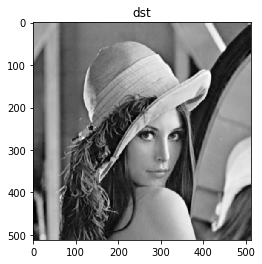

uint8


In [25]:
src = cv2.imread("lenna.bmp",0)
dst = cv2.filter2D(src, -1, mask)
imshow("dst", dst)
print(dst.dtype)

In [26]:
mask = np.array([
    [0, 0,  0],
    [0, 1 , -1],
    [0, 0,  0]
])
print(mask)  # 

[[ 0  0  0]
 [ 0  1 -1]
 [ 0  0  0]]


In [33]:
src = src.astype('float')

In [36]:
dst = cv2.filter2D(src, -1, mask)
print(dst.dtype)
print(dst)

float64
[[  0.   0.   1. ...  15.  27. -27.]
 [  0.   0.   1. ...  15.  27. -27.]
 [  0.   0.   1. ...  15.  27. -27.]
 ...
 [  0.  -7.   3. ...   4.   2.  -2.]
 [  0. -11.   4. ...  -1.  -3.   3.]
 [  0. -11.   4. ...  -1.  -3.   3.]]


In [38]:
dst = cv2.convertScaleAbs(dst)
print(dst)
print(dst.dtype)

[[ 0  0  1 ... 15 27 27]
 [ 0  0  1 ... 15 27 27]
 [ 0  0  1 ... 15 27 27]
 ...
 [ 0  7  3 ...  4  2  2]
 [ 0 11  4 ...  1  3  3]
 [ 0 11  4 ...  1  3  3]]
uint8


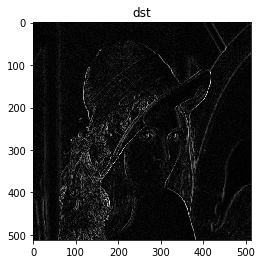

In [39]:
imshow("dst", dst)

(256, 256, 3)


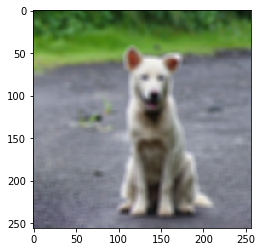

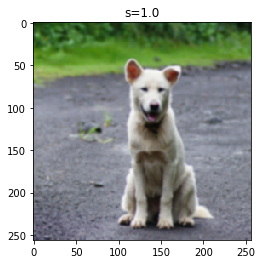

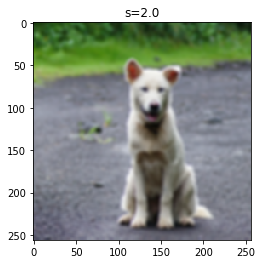

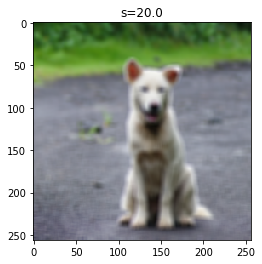

In [53]:
img  = cv2.imread('dog.bmp')
print(img.shape)
dst = cv2.blur(img, (7,7))
imshow("", dst)

dst2 = cv2.GaussianBlur(img, (7, 7),  1.0)
imshow("s=1.0", dst2)
dst2 = cv2.GaussianBlur(img, (7, 7),  2.0)
imshow("s=2.0", dst2)
dst2 = cv2.GaussianBlur(img, (7, 7),  20.0)
imshow("s=20.0", dst2)

In [57]:
img = cv2.imread('rose.bmp', 0)
sig = [1, 3, 20 ,50 ,90]
for s in sig :
    dst = cv2.GaussianBlur(img, (15, 15),  s)
    cv2.imshow("dst", dst)
    cv2.waitKey()
cv2.destroyAllWindows()    

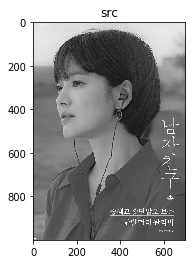

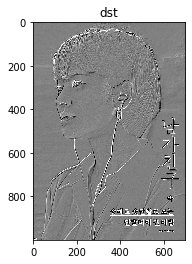

In [67]:
src = cv2.imread('song.jpeg', 0)

emboss = np.array([[1, 1, 0],
                   [1,  0, -1],
                    [0,  -1, -1]], np.float32)

dst = cv2.filter2D(src, -1, emboss, delta=128)

imshow('src', src)
imshow('dst', dst)


cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [85]:
src  = cv2.imread('song.jpeg')

sharp = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                  [-1, -1, -1]], np.float32)

sharp = np.array([[1, 0, -1],
                   [2, 1, -2],
                   [1, 0, -1]], np.float32)


dst = cv2.filter2D(src, -1, sharp)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [84]:
src  = cv2.imread('song.jpeg')

sharp = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], np.float32)

dst = cv2.filter2D(src, -1, sharp)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

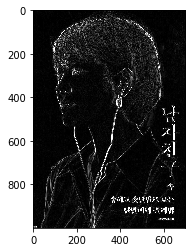

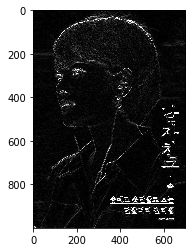

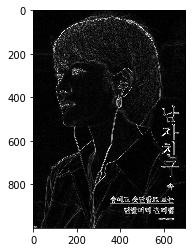

In [83]:
src = cv2.imread('song.jpeg', 0)
img_sobel_x = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
imshow("", img_sobel_x) 

img_sobel_y = cv2.Sobel(src, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)
imshow("", img_sobel_y) 

dst = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0.0)

imshow("", dst)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [88]:
sobel_ = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]], np.float32)

sobel_ = np.array([[1, 0, -1],
                   [2, 1, -2],
                   [1, 0, -1]], np.float32)


dst = cv2.filter2D(src, -1, sobel_)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

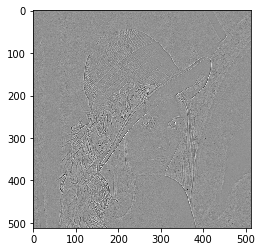

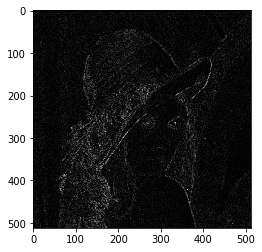

In [91]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (3, 3), 0)
laplacian = cv2.Laplacian(src, cv2.CV_32F)
dst = cv2.convertScaleAbs(laplacian)

imshow("", laplacian)
imshow("", dst)

cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [98]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

for stddev in [10, 20, 30]:
        noise = np.zeros(src.shape, np.int32)
        cv2.randn(noise, 0, stddev)
        dst = cv2.add(src, noise, dtype=cv2.CV_8UC1)
        desc = 'stddev = %d' % stddev
        cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                   1.0, 255, 1, cv2.LINE_AA)
        cv2.imshow('dst', dst)
        cv2.waitKey()

cv2.destroyAllWindows()

In [109]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)
        y = random.randint(0, src.shape[0] - 1)
        src[x, y] = (i % 2) * 255
        
        
dst1 = cv2.GaussianBlur(src, (21, 21), 1)
dst2 = cv2.medianBlur(src, 3)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [114]:
src = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size / 10)):
        x = random.randint(0, src.shape[1] - 1)
        y = random.randint(0, src.shape[0] - 1)
        src[y,x] = (i % 2) * 255
        
        
dst1 = cv2.GaussianBlur(src, (7, 7), 1)
dst2 = cv2.medianBlur(src, 3)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()

27